# 텐서플로우(Tensorflow 2)

* 구글에서 만들고 있는 머신러닝 라이브러리(주로 딥러닝에 사용됨)

## 텐서플로우 기초

In [14]:
import tensorflow as tf
import numpy as np

In [15]:
print(tf.__version__)

2.4.0


## 난수 생성(Random)

- 신경망? => "숫자로 구성된 행렬"
  - 입력 => [행렬 계산] => 결과
  - 초기값은 '랜덤'으로 입력
- 참고 : https://reniew.github.io/13/


In [8]:
# 균일(uniform)분포
# 균일 분포란? 최솟값과 최댓값 사이의 모든 수가 나올 확률이 '동일한 분포'
rand = tf.random.uniform([5, 10], 0, 1) # 행렬 모양, 최솟값, 최댓값
print(rand)

tf.Tensor(
[[0.31513727 0.04516017 0.9269053  0.709759   0.9798194  0.8760767
  0.12611139 0.02349067 0.4458431  0.95560324]
 [0.2170775  0.6619904  0.04812038 0.8658899  0.3195454  0.26546872
  0.7736151  0.6716815  0.11399388 0.6789596 ]
 [0.195961   0.27564096 0.41448843 0.14739394 0.6479577  0.7349154
  0.2016927  0.25292563 0.18585455 0.37063372]
 [0.70310354 0.7866192  0.5188345  0.34519446 0.55651295 0.7802969
  0.80638576 0.64125705 0.8957217  0.13890374]
 [0.48947442 0.21051443 0.87926793 0.9936507  0.6711149  0.01049614
  0.10827267 0.8159746  0.9174024  0.28936064]], shape=(5, 10), dtype=float32)


In [13]:
# 정규(normal)분포
rand = tf.random.normal([1], 0, 1) # 행렬 모양, 평균, 분산
print(rand)

tf.Tensor([1.580119], shape=(1,), dtype=float32)


### 뉴런

- 뉴런과 레이어 : 뉴런이 하나 또는 그 이상 있으면 레이어
  - 입력 -> 뉴런 -> 출력
  - 입력 -> [뉴런, 뉴런, 뉴런, 뉴런, 뉴런] -> 출력
  - 입력 -> [[뉴런, 뉴런, 뉴런, 뉴런, 뉴런][뉴런, 뉴런, 뉴런, 뉴런, 뉴런]] -> 출력
- 뉴런의 구성요소
  - 입력(X)
  - 가중치(w)
  - 편향(b, bias)
  - 활성화 함수(f)
    - 시그모이드(Sigmoid)
    - ReLU(Rectified Linear Unit)
  - 출력(Y)

- 활성화 함수의 종류
  - https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491

### AND

- [0, 0] = 0
- [0, 1] = 0
- [1, 0] = 0
- [1, 1] = 1

In [17]:
def sigmoid(x):
  return (1 / (1+np.exp(-x)))

In [26]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
w = tf.random.normal([2], 0, 1) # X에 맞게
b = tf.random.normal([1], 0, 1) # bias니까 1개
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[0.11998749]
400	Error[-0.06362854]
800	Error[-0.03543399]
1200	Error[-0.0244081]
1600	Error[-0.01856592]
tf.Tensor([6.997691 6.994582], shape=(2,), dtype=float32)
tf.Tensor([-11.662118], shape=(1,), dtype=float32)


In [27]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 7.420156550553429e-11
X: [0 1], Y: [0], output: 8.093214406245372e-08
X: [1 0], Y: [0], output: 8.118415204167994e-08
X: [1 1], Y: [1], output: 8.854044534460564e-05


### OR

In [28]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
w = tf.random.normal([2], 0, 1) 
b = tf.random.normal([1], 0, 1) 
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[0.51545733]
400	Error[-0.02691315]
800	Error[-0.01332202]
1200	Error[-0.00879373]
1600	Error[-0.0065467]
tf.Tensor([8.196582 8.195677], shape=(2,), dtype=float32)
tf.Tensor([-4.629883], shape=(1,), dtype=float32)


In [29]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 9.516856872141864e-05
X: [0 1], Y: [1], output: 0.25652885590612434
X: [1 0], Y: [1], output: 0.2567014951196896
X: [1 1], Y: [1], output: 0.9992019118140267


### XOR

In [32]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1) 
b = tf.random.normal([1], 0, 1) 
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[-1.6371659]
400	Error[-0.00027752]
800	Error[-4.7683716e-07]
1200	Error[-2.3841858e-07]
1600	Error[-1.1920929e-07]
tf.Tensor([-0.10256401 -0.05128208], shape=(2,), dtype=float32)
tf.Tensor([-0.94871765], shape=(1,), dtype=float32)


In [33]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 0.13039902692193425
X: [0 1], Y: [1], output: 0.1246932913033833
X: [1 0], Y: [1], output: 0.11920298825972614
X: [1 1], Y: [0], output: 0.11392295661501356


### XOR(텐서플로우를 이용해서 풀어보자)

- 딥러닝
  - Layer를 구성하는게 가장 중요한 일
  - 최적의 'w', 'b'를 결정


In [48]:
# 입력과 출력
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 레이어를 설계
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape = (2,)), # input_shape 별도 표기
  tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
                
])

# 레이어를 컴파일
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

# 레이어 확인
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 학습
history = model.fit(x, y, epochs = 2000, batch_size = 1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2561
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2390
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2361
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2540
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2432
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2432
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2479
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2613
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 13/2000
4/4 [==============================

In [50]:
model.predict(x)

array([[0.11886024],
       [0.8406936 ],
       [0.8410742 ],
       [0.22222319]], dtype=float32)

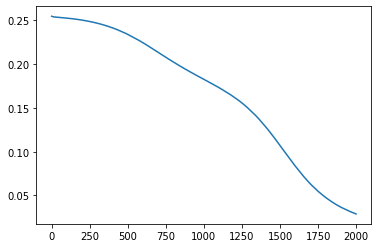

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## 회귀

## 분류